## Análisis Exploratorio de Datos (EDA) - Enfermedad Cardíaca

### 1. Introducción

* Objetivo: A partir de ciertos atributos, predecir según los valores de los mismos, la probabilidad de ser diagnosticado con una enfermedad cardiaca.
* Fuente de Datos: UCI Heart Disease
* Target: 1 = Tiene una enfermedad cardiaca; 0 = No tiene enfermedad cardiaca


### 2. Carga y preparación de los datos
- Leer y unir los datasets.
- Reemplazar valores faltantes o inválidos.
- Asegurar que los tipos de datos sean correctos.


In [ ]:
# cp (chest pain type), trestbps (time resting blood pressure), chol (serum cholesterol),
# fbs (fasting blood sugar), restecg (resting electrocardiographic results), thalach (maximum heart rate achieved),
# exang (exercise induced angina), oldpeak (depression induced by exercise relative to rest), slope (slope of the peak exercise ST segment),
# ca (number of major vessels colored by fluoroscopy), thal (thalassemia), target (presence of heart disease)

columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

import pandas as pd
data_cleveland = pd.read_csv("C:/Users/HP/Desktop/Proyecto/Dataset/processed.cleveland.data", names=columns)
data_hungarian = pd.read_csv("C:/Users/HP/Desktop/Proyecto/Dataset/processed.hungarian.data", names=columns)
data_switzerland = pd.read_csv("C:/Users/HP/Desktop/Proyecto/Dataset/processed.switzerland.data", names=columns)
data_va_longbeach = pd.read_csv("C:/Users/HP/Desktop/Proyecto/Dataset/processed.va.data", names=columns)

: 

In [2]:
# Concatenate all datasets into a single DataFrame
df = pd.concat([data_cleveland, data_hungarian, data_switzerland, data_va_longbeach], ignore_index=True)

# Replace missing values represented by "?" with NaN
df.replace("?", pd.NA, inplace=True)

# Convert data types to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='ignore')

# Convert all target values to 1 for presence of heart disease and 0 for absence
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,1
918,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0


### 3. Análisis general del dataset
- Mostrar dimensiones, tipos de datos y resumen con `info()`.
- Estadísticas descriptivas generales (`describe()`).
- Cantidad de valores faltantes por columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.553261
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
# Total of missing values in the dataset
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

### 4. Análisis univariado
- Distribución de cada variable numérica (histogramas).
- Distribución de variables categóricas (barras).
- Detectar outliers visualmente (boxplots).

In [7]:
df["target"].value_counts()

target
1    509
0    411
Name: count, dtype: int64

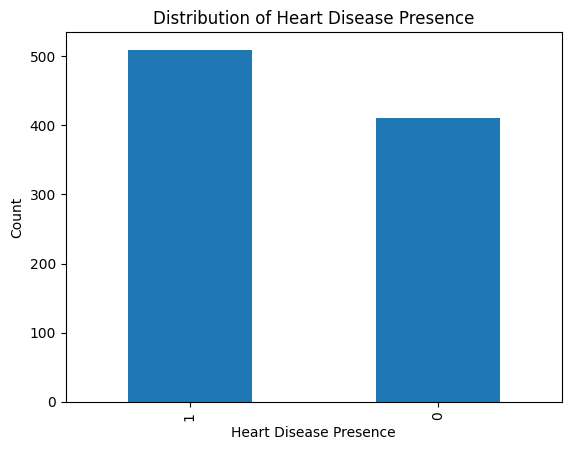

In [8]:
# Histogram of the target variable
import matplotlib.pyplot as plt
df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.show()

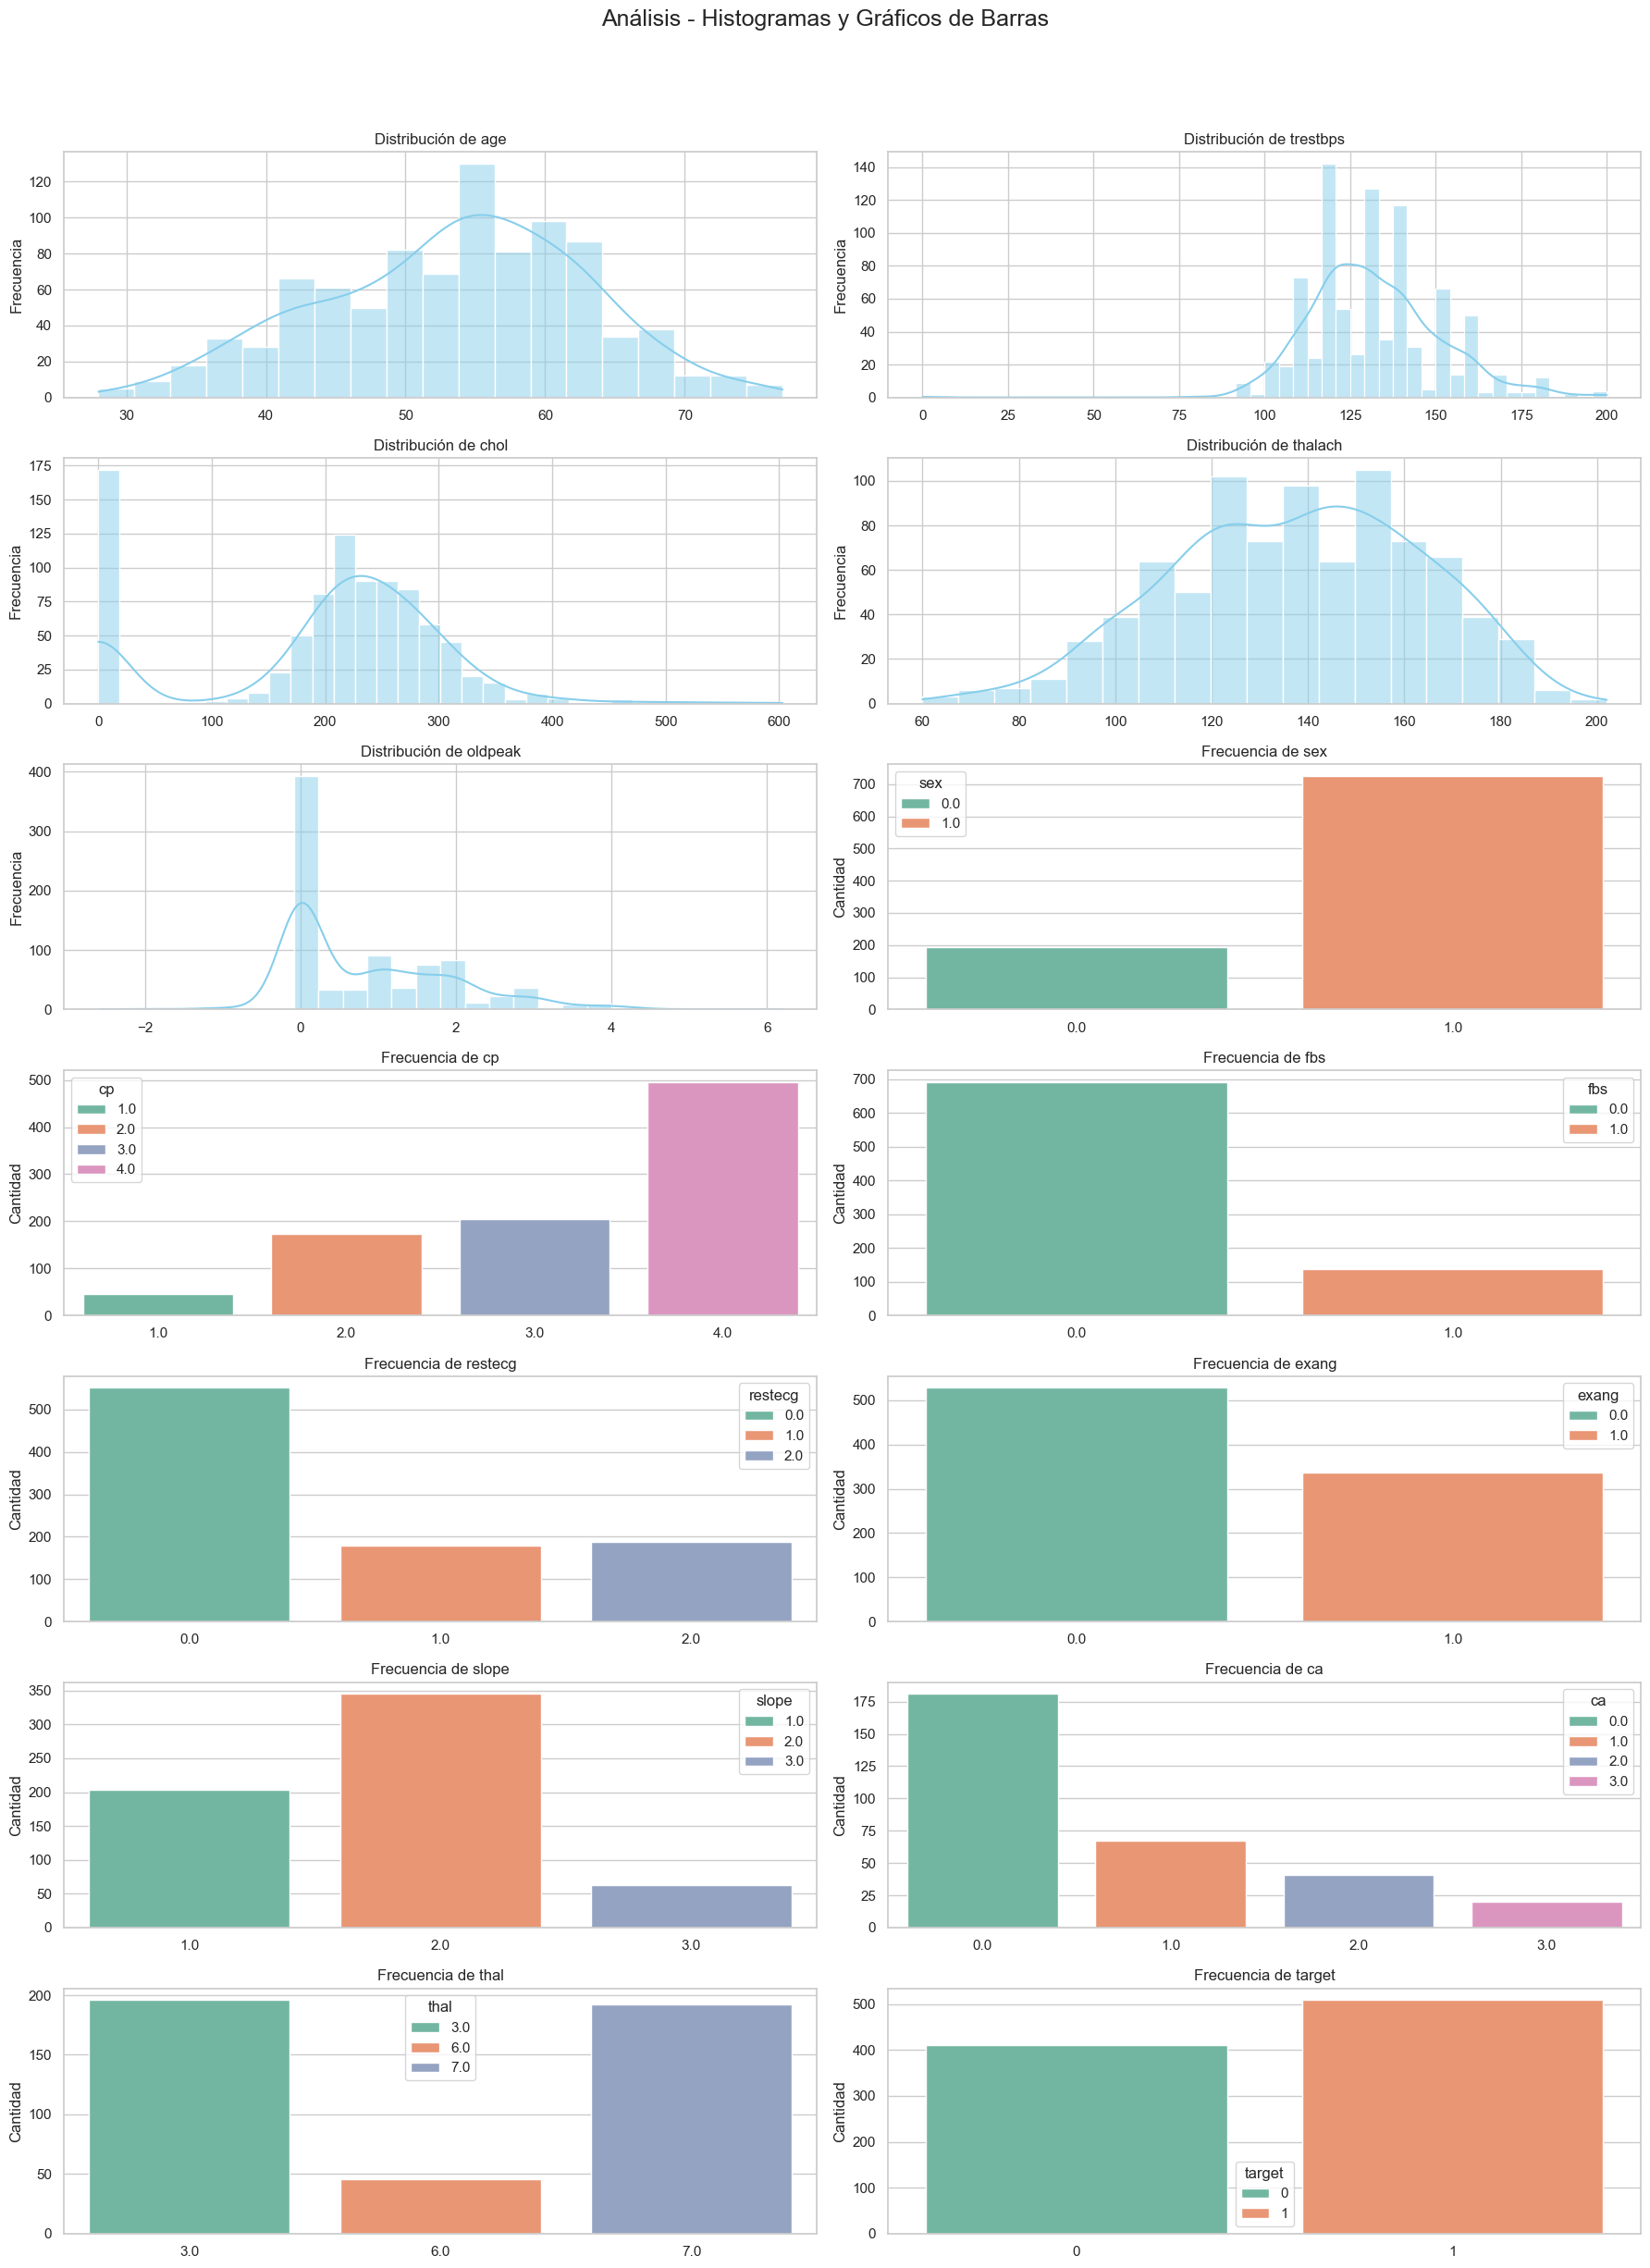

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(7, 2, figsize=(18, 25))
fig.suptitle("Análisis - Histogramas y Gráficos de Barras", fontsize=18)
axs = axs.flatten()

# Variables
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]

# Histogramas
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i], color="skyblue")
    axs[i].set(title=f"Distribución de {col}", xlabel=None, ylabel="Frecuencia")

# Gráficos de barra
for j, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axs[j + len(numeric_cols)], palette="Set2", hue=col)
    axs[j + len(numeric_cols)].set(title=f"Frecuencia de {col}", xlabel=None, ylabel="Cantidad")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 5. Análisis bivariado
- Comparar cada variable con el `target`.
- Usar boxplots y violin plots para numéricas vs `target`.
- Usar tablas de contingencia y barras apiladas para categóricas.

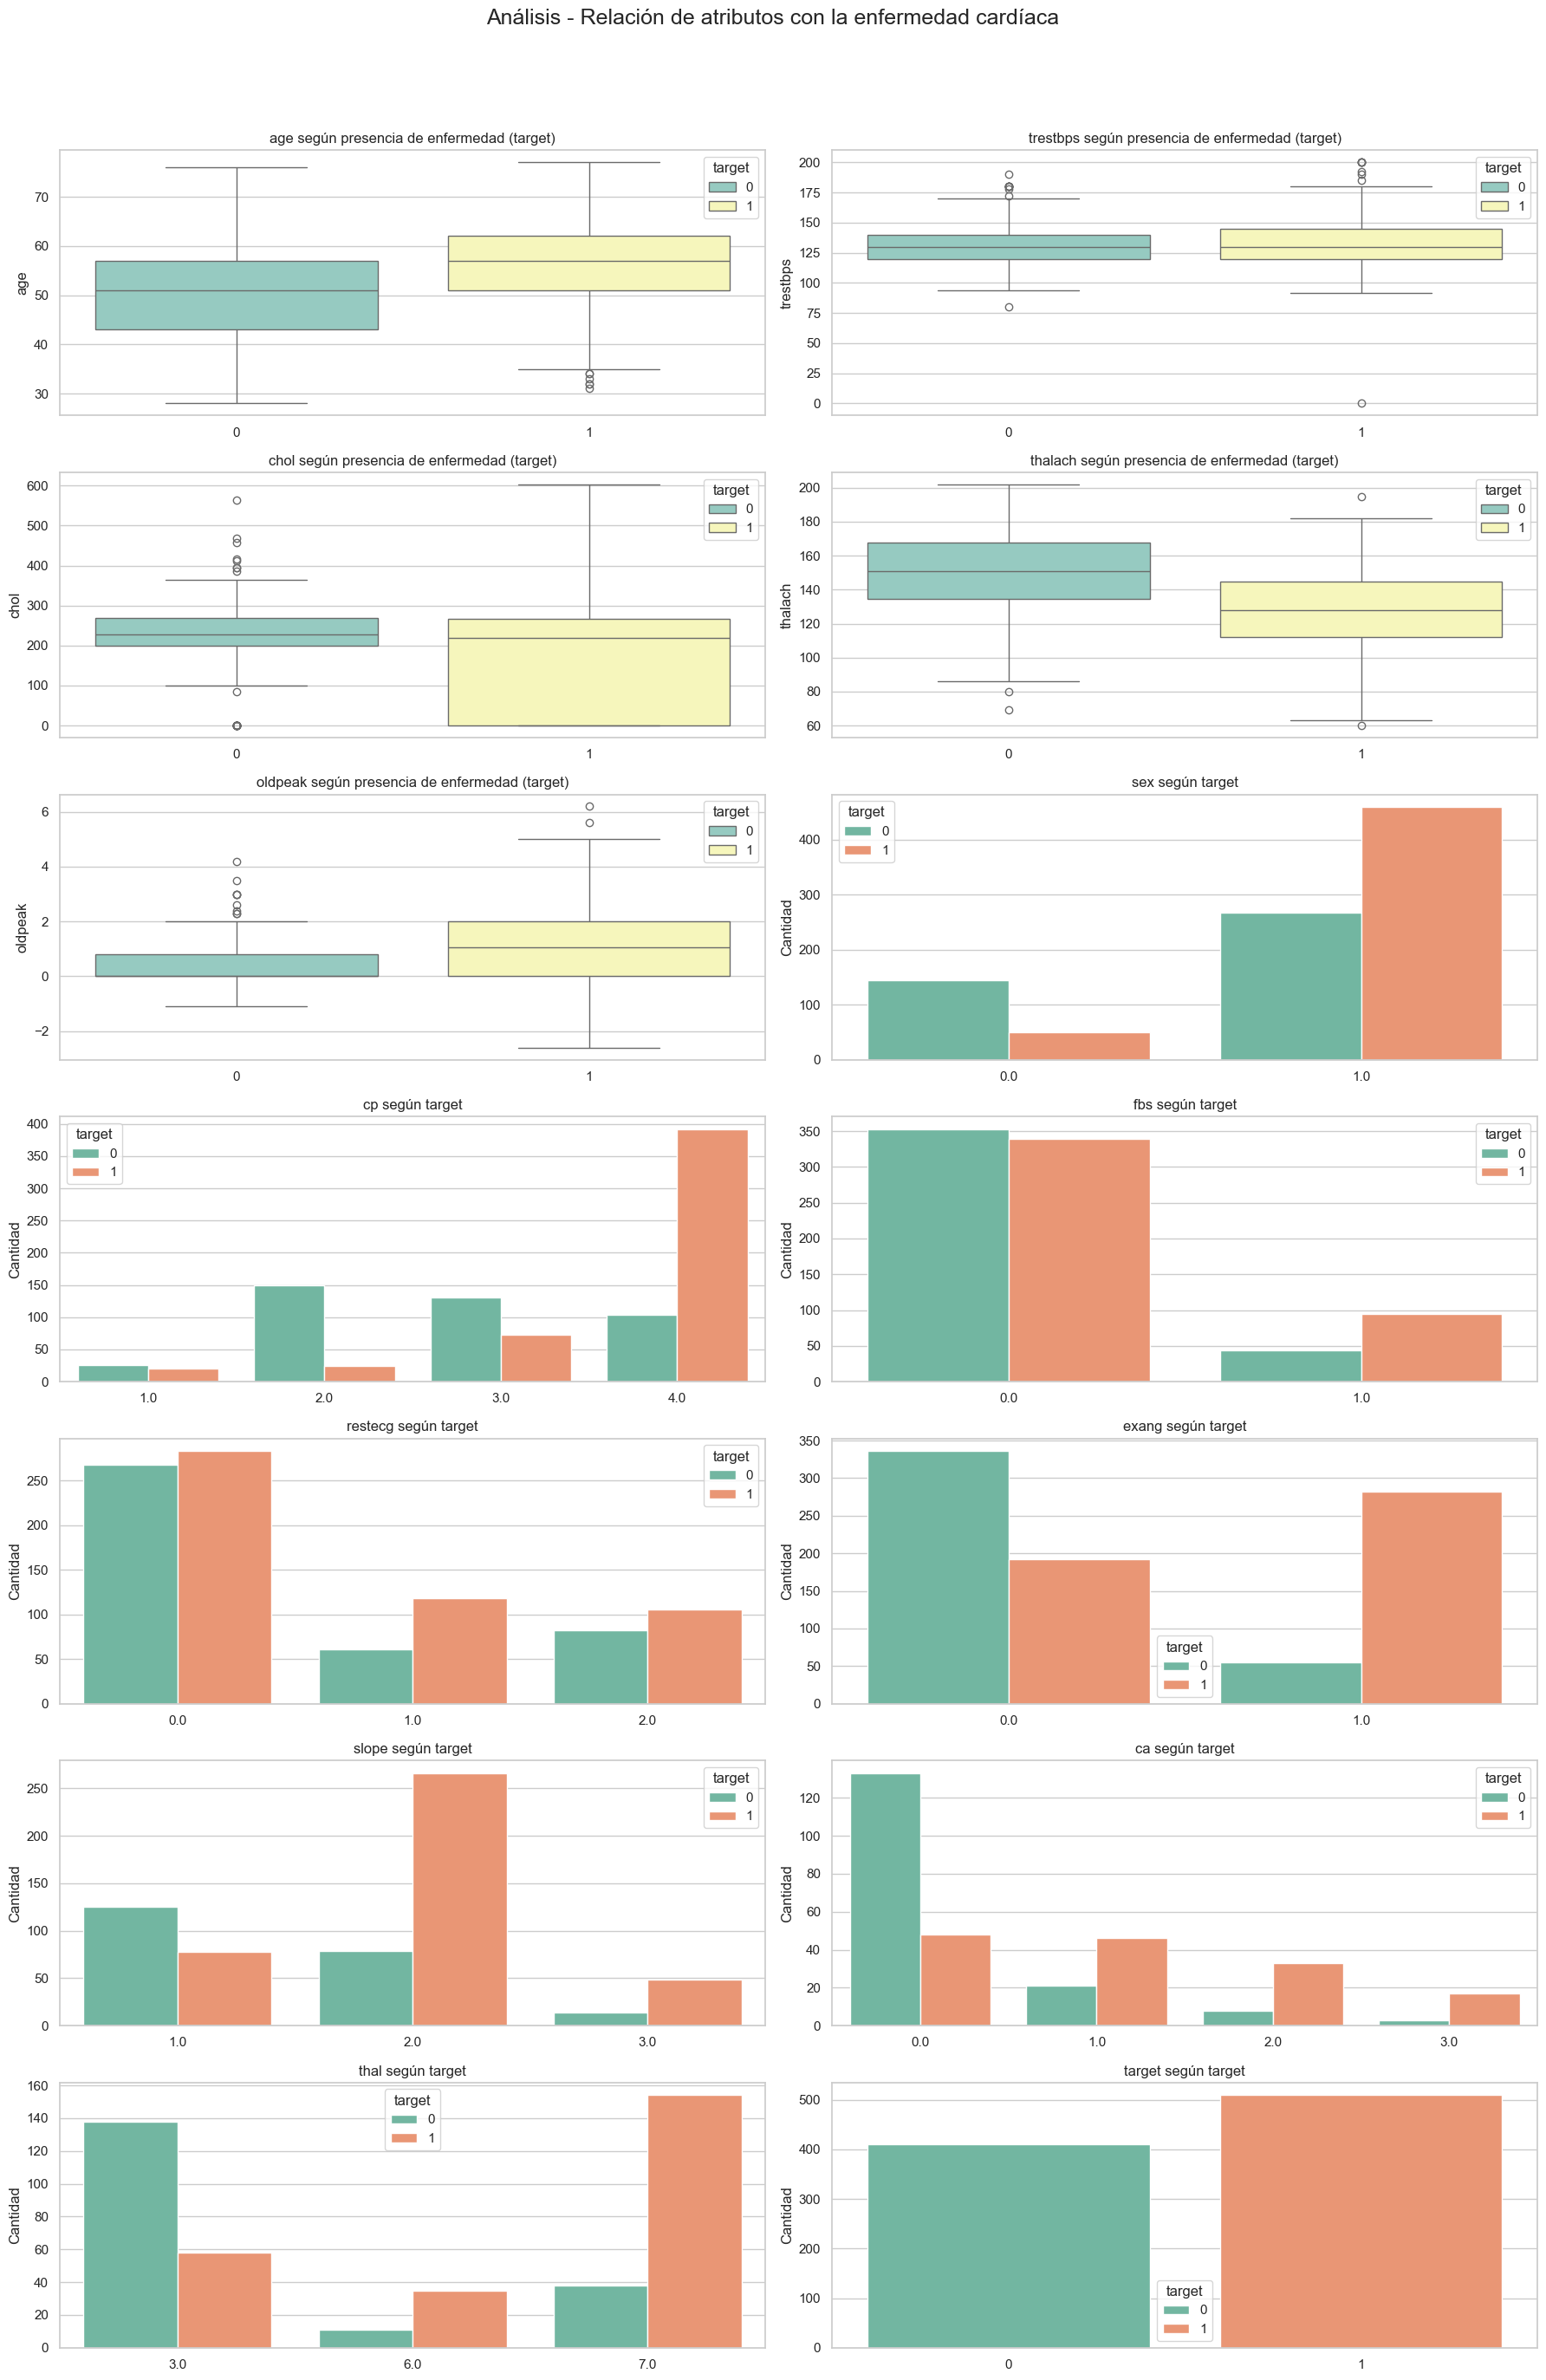

In [10]:
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(7, 2, figsize=(18, 28))
fig.suptitle("Análisis - Relación de atributos con la enfermedad cardíaca", fontsize=18)
axs = axs.flatten()

# Boxplots para numéricos
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x="target", y=col, ax=axs[i], palette="Set3", hue="target", hue_order=[0, 1])
    axs[i].set(title=f"{col} según presencia de enfermedad (target)", xlabel=None, ylabel=col)

# Countplots con hue para categóricos
for j, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue="target", ax=axs[j + len(numeric_cols)], palette="Set2", hue_norm=(0, 1))
    axs[j + len(numeric_cols)].set(title=f"{col} según target", xlabel=None, ylabel="Cantidad")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Análisis de Gráficos:
### Histogramas
- Age: Distribución mayormente entre 40 y 60 años. Factor importante en riesgo cardiaco.
- Trestbps: Mayormente entre 120 - 140 mmHg, algunos con hipertensión.
- Chol: Variados, algunos con colesterol alto (> 240 mg/dL) y es un factor de riesgo.
- Thalach: La frecuencia cardiaca máxima disminuye en pacientes con enfermedad
- Oldpeak: Depresión en segmento ST, mayoría cerca de 0 y algunos con valores altos, lo que indica isquemia.
### Gráficos de Barras
- Sex: Mayormente hombres y con mayor riesgo de enfermedad cardiaca.
- Cp: Variedad de tipos de dolores de pecho.
- Fbs: Mayormente valores normales de azúcar en sangre.
- Restecg: Diferentes patrones, indicando problemas eléctricos cardiacos.
- Exang: Pacientes con anginas tienden a tener más enfermedad.
- Slope: Diferentes pendientes del segmento ST indican gravedad.
- Ca: Mayores vasos principales coloreados mayor riesgo.
- Thal: Anormalidades de talasemia reflejan enfermedades cardiacas congénitas.
##### Target: Indica presencia de enfermedad cardiaca, tenemos dataset ligeramente desbalanceado.

### 6. Correlaciones y relaciones
- Calcular y graficar la matriz de correlación.
- Analizar relaciones fuertes con el `target`.
- Comentar posibles multicolinealidades.

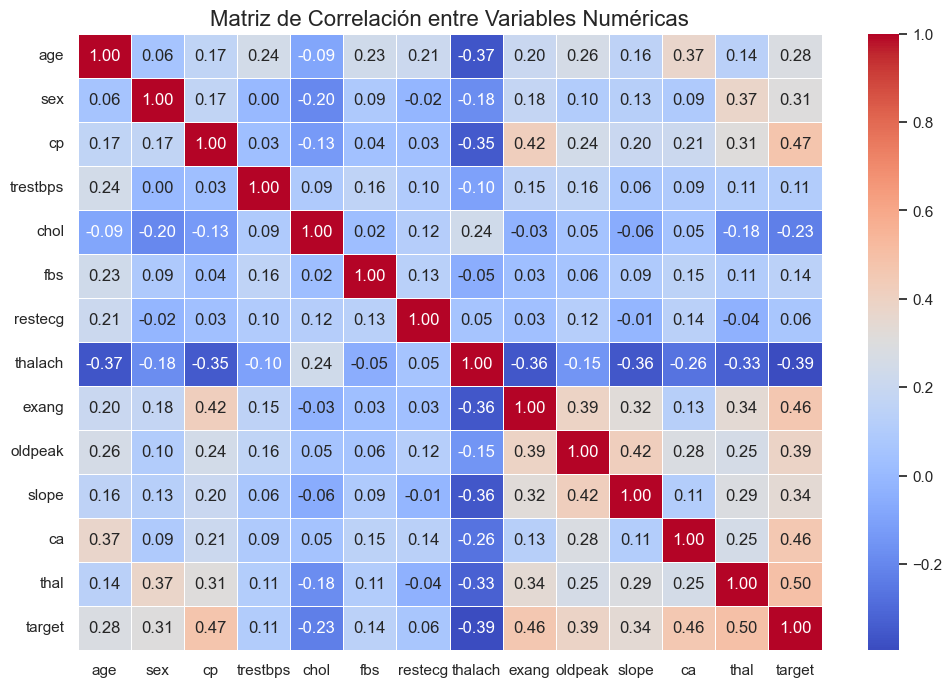

In [11]:
# Correlación solo para columnas numéricas
corr_matrix = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas", fontsize=16)
plt.show()

### 7. Conclusiones del EDA
- Variables más relevantes para predecir enfermedad cardíaca.
- Posibles transformaciones o limpieza futura.
- Ideas para modelado predictivo.

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,1
918,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
df.to_csv("../Dataset/df.csv", index=False)